In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
cities = []

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
numOfCities = len(cities)
print(numOfCities)
pprint(cities)

614
['ponta delgada',
 'san quintin',
 'albany',
 'presidencia roque saenz pena',
 'puerto escondido',
 'pahrump',
 'cotonou',
 'sibolga',
 'poronaysk',
 'vaini',
 'pizarro',
 'ushuaia',
 'mar del plata',
 'plettenberg bay',
 'lebu',
 'leningradskiy',
 'rikitea',
 'uyovu',
 'mahebourg',
 'ilulissat',
 'cape town',
 'vila velha',
 'nouadhibou',
 'yellowknife',
 'attawapiskat',
 'hermanus',
 'new norfolk',
 'kodiak',
 'mendi',
 'torbay',
 'east london',
 'busselton',
 'barrow',
 'nizhneyansk',
 'kulhudhuffushi',
 'kununurra',
 'murud',
 'jarjis',
 'karasburg',
 'isangel',
 'mataura',
 'mahadday weyne',
 'punta arenas',
 'qaanaaq',
 'makat',
 'port alfred',
 'hornepayne',
 'bambanglipuro',
 'gimli',
 'cherskiy',
 'esperance',
 'sitka',
 'shchelyayur',
 'grand river south east',
 'puerto ayora',
 'heze',
 'charters towers',
 'pasighat',
 'amahai',
 'georgetown',
 'sumbawa',
 'khvorostyanka',
 'grand baie',
 'dikson',
 'oussouye',
 'khatanga',
 'escanaba',
 'grand gaube',
 'tanggu',
 'avaru

## Perform API Calls

In [3]:
rowCount = 1

# Create a list to hold the info parsed 
cityData = []
recordCount = 1

# Loop through to get the info per city 
for city in cities:
    # Create the endpoint URL
    url = "http://api.openweathermap.org/data/2.5/weather"
    
    parameters = {"units": "IMPERIAL","APPID": api_key,"q": city}
    
    # Run requests to get the JSON files
    cityResponse = requests.get(url, params=parameters)
    
    # Print the list of URLS as the loop progresses
    print(f"Processing Record {recordCount} of {numOfCities} | {city}")
    print(cityResponse.url)
    recordCount += 1
    
    # Use try/except to skip any cities with errors 
    try: 
        cityResponse_json = cityResponse.json()
        clouds = cityResponse_json["clouds"]["all"]
        country = cityResponse_json["sys"]["country"]
        humidity = cityResponse_json["main"]["humidity"]
        lat = cityResponse_json["coord"]["lat"]
        lng = cityResponse_json["coord"]["lon"]
        temp = cityResponse_json["main"]["temp_max"]
        wind = cityResponse_json["wind"]["speed"]
        
        # Append the list to a single dictionary for each parameter 
        cityData.append({"City": city, "Cloudiness": clouds, "Country": country, 
                         "Humidity": humidity, "Lat": lat, 
                         "Lng": lng, "Temp": temp, "Wind Speed": wind})
        
    except KeyError:
        print("City not found")

print("***************DONE*****************")


Processing Record 1 of 614 | ponta delgada
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=ponta+delgada
Processing Record 2 of 614 | san quintin
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=san+quintin
Processing Record 3 of 614 | albany
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=albany
Processing Record 4 of 614 | presidencia roque saenz pena
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=presidencia+roque+saenz+pena
Processing Record 5 of 614 | puerto escondido
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=puerto+escondido
Processing Record 6 of 614 | pahrump
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=pahrump
Processing Record 7 of 614 | coton

Processing Record 54 of 614 | grand river south east
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=grand+river+south+east
City not found
Processing Record 55 of 614 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=puerto+ayora
Processing Record 56 of 614 | heze
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=heze
Processing Record 57 of 614 | charters towers
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=charters+towers
Processing Record 58 of 614 | pasighat
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=pasighat
Processing Record 59 of 614 | amahai
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=amahai
Processing Record 60 of 614 | georgetown


Processing Record 107 of 614 | saint-georges
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=saint-georges
Processing Record 108 of 614 | pevek
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=pevek
Processing Record 109 of 614 | chapais
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=chapais
Processing Record 110 of 614 | svetlogorsk
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=svetlogorsk
Processing Record 111 of 614 | coahuayana
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=coahuayana
Processing Record 112 of 614 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=tasiilaq
Processing Record 113 of 614 | tsiroanomandidy
http://api.openweathermap.org

Processing Record 160 of 614 | awjilah
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=awjilah
Processing Record 161 of 614 | flin flon
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=flin+flon
Processing Record 162 of 614 | tuatapere
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=tuatapere
Processing Record 163 of 614 | macau
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=macau
Processing Record 164 of 614 | havre-saint-pierre
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=havre-saint-pierre
Processing Record 165 of 614 | wencheng
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=wencheng
Processing Record 166 of 614 | sao joao da barra
http://api.openweatherm

Processing Record 213 of 614 | banjar
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=banjar
Processing Record 214 of 614 | idrinskoye
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=idrinskoye
Processing Record 215 of 614 | itoman
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=itoman
Processing Record 216 of 614 | shihezi
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=shihezi
Processing Record 217 of 614 | nanortalik
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=nanortalik
Processing Record 218 of 614 | verkhnyaya inta
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=verkhnyaya+inta
Processing Record 219 of 614 | naze
http://api.openweathermap.org/data/2.5/w

Processing Record 267 of 614 | litoral del san juan
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=litoral+del+san+juan
City not found
Processing Record 268 of 614 | suntar
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=suntar
Processing Record 269 of 614 | dakar
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=dakar
Processing Record 270 of 614 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=ribeira+grande
Processing Record 271 of 614 | gudari
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=gudari
Processing Record 272 of 614 | bridlington
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=bridlington
Processing Record 273 of 614 | nortelandia
ht

Processing Record 321 of 614 | jiwani
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=jiwani
Processing Record 322 of 614 | hasaki
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=hasaki
Processing Record 323 of 614 | kahului
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=kahului
Processing Record 324 of 614 | puerto ayacucho
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=puerto+ayacucho
Processing Record 325 of 614 | gopalpur
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=gopalpur
Processing Record 326 of 614 | peterhead
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=peterhead
Processing Record 327 of 614 | alice springs
http://api.openweathermap.org/data/2.

Processing Record 375 of 614 | broken hill
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=broken+hill
Processing Record 376 of 614 | vardo
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=vardo
Processing Record 377 of 614 | las palmas
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=las+palmas
Processing Record 378 of 614 | de aar
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=de+aar
Processing Record 379 of 614 | jardim
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=jardim
Processing Record 380 of 614 | schiedam
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=schiedam
Processing Record 381 of 614 | ust-tsilma
http://api.openweathermap.org/data/2.5/weather?uni

Processing Record 429 of 614 | batemans bay
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=batemans+bay
Processing Record 430 of 614 | khor
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=khor
Processing Record 431 of 614 | bima
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=bima
Processing Record 432 of 614 | flinders
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=flinders
Processing Record 433 of 614 | el campo
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=el+campo
Processing Record 434 of 614 | kalakamati
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=kalakamati
Processing Record 435 of 614 | tetela de ocampo
http://api.openweathermap.org/data/2.5/weath

Processing Record 483 of 614 | cruz grande
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=cruz+grande
Processing Record 484 of 614 | rohnert park
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=rohnert+park
Processing Record 485 of 614 | moron
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=moron
Processing Record 486 of 614 | basak
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=basak
Processing Record 487 of 614 | huarmey
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=huarmey
Processing Record 488 of 614 | port macquarie
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=port+macquarie
Processing Record 489 of 614 | wawa
http://api.openweathermap.org/data/2.5/w

Processing Record 537 of 614 | rocha
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=rocha
Processing Record 538 of 614 | khasan
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=khasan
Processing Record 539 of 614 | bara
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=bara
Processing Record 540 of 614 | abha
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=abha
Processing Record 541 of 614 | samusu
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=samusu
City not found
Processing Record 542 of 614 | kavaratti
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=kavaratti
Processing Record 543 of 614 | beloha
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&A

Processing Record 591 of 614 | listowel
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=listowel
Processing Record 592 of 614 | biu
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=biu
Processing Record 593 of 614 | areia branca
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=areia+branca
Processing Record 594 of 614 | vytegra
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=vytegra
Processing Record 595 of 614 | mount isa
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=mount+isa
Processing Record 596 of 614 | pirsagi
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&APPID=3fc56015a6af0c66d55328496d45481c&q=pirsagi
City not found
Processing Record 597 of 614 | saint-denis
http://api.openweathermap.org/data

In [4]:
cities_df = pd.DataFrame(cityData)
# Save the DF
cities_df.to_csv("cities.csv")
cities_df.head()

,City,Cloudiness,Country,Humidity,Lat,Lng,Temp,Wind Speed
0,ponta delgada,40,PT,69,37.73,-25.67,75.20,13.87
1,san quintin,88,PH,93,17.54,120.52,73.97,1.92
2,albany,90,US,88,42.65,-73.75,80.60,9.17
3,presidencia roque saenz pena,0,AR,48,-26.79,-60.44,66.14,8.30
4,puerto escondido,75,MX,69,15.86,-97.07,82.40,2.15


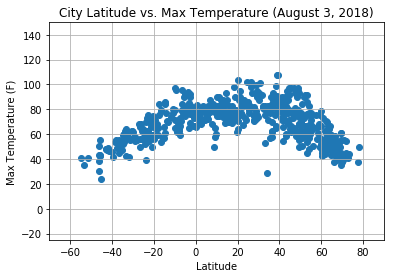

In [13]:
# Build a scatter plot for each data type
plt.scatter(cities_df["Lat"], cities_df["Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (August 3, 2018)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylim(-25, 150)
plt.xlim(-70, 90)
plt.grid(True)

# Save the figure
plt.savefig("TempVSLat.png")

# Show plot
plt.show()

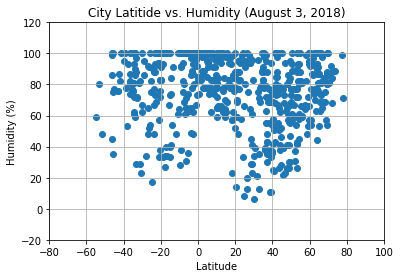

<Figure size 432x288 with 0 Axes>

In [6]:
plt.scatter(cities_df["Lat"], cities_df["Humidity"], marker="o")
plt.title("City Latitide vs. Humidity (August 3, 2018)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(-20, 120)
plt.xlim(-80, 100)
plt.grid()
plt.show()
# Save the figure
plt.savefig("HumidVSLat.png")

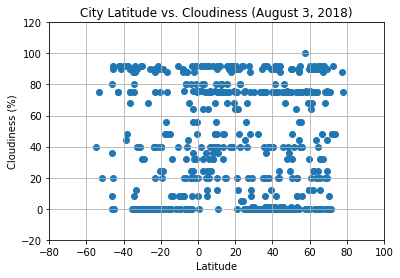

<Figure size 432x288 with 0 Axes>

In [7]:
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], marker="o")
plt.title("City Latitude vs. Cloudiness (August 3, 2018)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-20, 120)
plt.xlim(-80, 100)
plt.grid()
plt.show()
# Save the figure
plt.savefig("CloudVSLat.png")

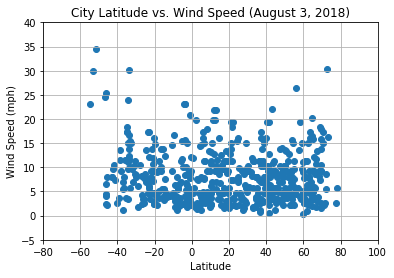

<Figure size 432x288 with 0 Axes>

In [8]:
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], marker="o")
plt.title("City Latitude vs. Wind Speed (August 3, 2018)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-5, 40)
plt.xlim(-80, 100)
plt.grid()
plt.show()
# Save the figure
plt.savefig("WindVSLat.png")

In [9]:
#You must include a written description of three observable trends based on the data.
# 1. Temperatures rise closer to the equator (see arch in table). My sample cities show warmer temperatures in cities from  
#    the northern hemisphere when compared to cities equally distant from the equator in the southern hemisphere. For example, 
#    cities in the 50 latitude are warmer than cities in the -50 latitude. This is due to the tilt of the Earth and opposit 
#    seasons in the Northern (currently summer) and Southern (currently winter) hemispheres. 
# 2. There doesn't appear to be a strong correlation between wind speed and latitude. Wind speed in my sample cities appears 
#    to be similar despite latitude, with most wind speeds reporting at between 0 and 10 mph. 
# 3. There doesn't appear to be a strong correlation between humidity and latitude. The majority of cities in my sample fall 
#    between 60 and 100% humidity. 